<a href="https://colab.research.google.com/github/dadulya/My_First_Test_Repo/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Подключение Pandas и NumPy
import pandas as pd
import numpy as np

In [ ]:
# 2. Пример создания таблицы (DataFrame) с помощью кода
df_init = pd.DataFrame({
    'имя': ['Павагада солнечный парк', 'Солнечный парк в пустыне Тенгер', 'Солнечный парк Бхадла', 'Солнечный парк плотины Лунъянся'],
    'страна': ['Индия', 'Китай', 'Индия', 'Китай'],
    'мощность[МВт]': [2050, 1.547, 1.515, 850],
    'год': [2017, 2016, 2017, 2015]
})

df_init.head()

,имя,страна,мощность[МВт],год
0,Павагада солнечный парк,Индия,2050.000,2017
1,Солнечный парк в пустыне Тенгер,Китай,1.547,2016
2,Солнечный парк Бхадла,Индия,1.515,2017
3,Солнечный парк плотины Лунъянся,Китай,850.000,2015


In [ ]:
# 3. Добавление строк
# Для добавления строк можно использовать функцию append. По сути здесь создается еще одна таблица тем же способом, что df_init. Затем добавляется к df_init
df_exted = df_init.append(pd.DataFrame({'имя': ['Проект солнечной энергии Камути', 'Топаз солнечная ферма'], 'страна': ['Индия','Соединенные Штаты'], 'мощность[МВт]': [648, 550], 'год': [2016, 2014]}), ignore_index = True)

# первые строки таблицы можно вывести на экран в более простом виде, применив функцию print.
print(df_exted)
print()

# Получение списка имен столбцов
print('имена столбцов:', df_exted.columns.values)

                               имя             страна  мощность[МВт]   год
0          Павагада солнечный парк              Индия       2050.000  2017
1  Солнечный парк в пустыне Тенгер              Китай          1.547  2016
2            Солнечный парк Бхадла              Индия          1.515  2017
3  Солнечный парк плотины Лунъянся              Китай        850.000  2015
4  Проект солнечной энергии Камути              Индия        648.000  2016
5            Топаз солнечная ферма  Соединенные Штаты        550.000  2014

имена столбцов: ['имя' 'страна' 'мощность[МВт]' 'год']


In [ ]:
# Можно делать разничные визуальные эффекты, и управлять форматом отображения таблицных данных, 
# но здесь их рассматривать не будем (https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).
df_exted.style.bar(color = '#00FF00', vmin = 0).format({'мощность': '{:.1f}'})

,имя,страна,мощность[МВт],год
0,Павагада солнечный парк,Индия,2050.000000,2017
1,Солнечный парк в пустыне Тенгер,Китай,1.547000,2016
2,Солнечный парк Бхадла,Индия,1.515000,2017
3,Солнечный парк плотины Лунъянся,Китай,850.000000,2015
4,Проект солнечной энергии Камути,Индия,648.000000,2016
5,Топаз солнечная ферма,Соединенные Штаты,550.000000,2014


In [ ]:
# 4. Добавление столбца.
# Например, добавим каждой станции условное обозначение - идентификатор
df_exted.insert(4, 'расстояние(км^2)', [53, 43, 40, 23, 10.1, 24.6])

print(df_exted)
print()



                               имя             страна  ...   год  расстояние(км^2)
0          Павагада солнечный парк              Индия  ...  2017              53.0
1  Солнечный парк в пустыне Тенгер              Китай  ...  2016              43.0
2            Солнечный парк Бхадла              Индия  ...  2017              40.0
3  Солнечный парк плотины Лунъянся              Китай  ...  2015              23.0
4  Проект солнечной энергии Камути              Индия  ...  2016              10.1
5            Топаз солнечная ферма  Соединенные Штаты  ...  2014              24.6

[6 rows x 5 columns]



In [ ]:
# 5. Сортировка
df_exted = df_exted.sort_values(['имя'])
print(df_exted)
print()

# ascending задает сортировку по убыванию или возрастанию
# по умолчанию True - сортировка по убыванию, если поставить False, то будет по возрастанию
df_exted = df_exted.sort_values(['мощность[МВт]'], ascending = True)
print(df_exted)

                               имя             страна  ...   год  расстояние(км^2)
0          Павагада солнечный парк              Индия  ...  2017              53.0
4  Проект солнечной энергии Камути              Индия  ...  2016              10.1
2            Солнечный парк Бхадла              Индия  ...  2017              40.0
1  Солнечный парк в пустыне Тенгер              Китай  ...  2016              43.0
3  Солнечный парк плотины Лунъянся              Китай  ...  2015              23.0
5            Топаз солнечная ферма  Соединенные Штаты  ...  2014              24.6

[6 rows x 5 columns]

                               имя             страна  ...   год  расстояние(км^2)
2            Солнечный парк Бхадла              Индия  ...  2017              40.0
1  Солнечный парк в пустыне Тенгер              Китай  ...  2016              43.0
5            Топаз солнечная ферма  Соединенные Штаты  ...  2014              24.6
4  Проект солнечной энергии Камути              Индия  ...  2016

In [ ]:
# 6. Создание столбцов на основе вычислений.
# Чтобы случайно не испортить df_exted, будем работать с копией
df_exted_2 = df_exted.copy()

# Добавление столбца на основе формулы делается легко
df_exted_2['выработка_за_сутки'] = df_exted_2['мощность[МВт]'] * 24 # 24 часа в сутках

# Сложности могут возникнуть когда нужно реализовать условия и работать с текстовыми данными.

# Условия можно задавать через NumPy функцию where, а поиск подстроки в строке через find.
# Так можно одной строкой задать целый алгоритм:


df_exted_2['географическое положение'] = np.where(df_exted_2['страна'].str.find('Индия') >= 0, 'Восток', np.where(df_exted_2['страна'].str.find('Китай') >= 0, 'Азия',  '?'))


print(df_exted_2)

# Легко применить расчеты, используя несколько столбцов сразу
df_exted_2['проверка_расчетов'] =  df_exted_2['выработка_за_сутки'] / df_exted_2['мощность[МВт]'] == 24
print(df_exted_2)

                               имя  ... географическое положение
2            Солнечный парк Бхадла  ...                   Восток
1  Солнечный парк в пустыне Тенгер  ...                     Азия
5            Топаз солнечная ферма  ...                        ?
4  Проект солнечной энергии Камути  ...                   Восток
3  Солнечный парк плотины Лунъянся  ...                     Азия
0          Павагада солнечный парк  ...                   Восток

[6 rows x 7 columns]
                               имя  ... проверка_расчетов
2            Солнечный парк Бхадла  ...              True
1  Солнечный парк в пустыне Тенгер  ...              True
5            Топаз солнечная ферма  ...              True
4  Проект солнечной энергии Камути  ...              True
3  Солнечный парк плотины Лунъянся  ...              True
0          Павагада солнечный парк  ...              True

[6 rows x 8 columns]


In [ ]:
# 7. Выборка нужных фрагментов. Есть три основных способа выделения фрагментов.

# 7.1. Через имя столбца или столбцов
print('все данные из столбцов \'имя\' и \'мощность\'')
print(df_exted_2[['имя', 'мощность[МВт]']])
print()
print('все данные из столбца \'имя\'')
print(df_exted_2.имя)
print()

# 7.2. Через loc по именам строк и столбцов
print('данные из строк \'Солнечный парк Бхадла\' и \' Солнечный парк в пустыне Тенгер \' и столбцов \'имя\' и \'мощность[МВт]\'')
print(df_exted_2.loc[[2, 1], ['имя', 'мощность[МВт]']])
print()

print('все данные из строки \2')
print(df_exted_2.loc[[2]])
print()

# 7.3. Через iloc по номерам строк и столбцов, номера идут с нуля
print('данные из первой строки и второго столбца')
print(df_exted_2.iloc[1 , 2])
print()
print('данные из всех строк кроме двух последних и из столбцов со второго по четвертый включительно')
print(df_exted_2.iloc[: -2, 2 : 5])
print()
print('данные из нечетных строк и третьего столбца')
print(df_exted_2.iloc[ : : 2, 3])
print()

все данные из столбцов 'имя' и 'мощность'
                               имя  мощность[МВт]
2            Солнечный парк Бхадла          1.515
1  Солнечный парк в пустыне Тенгер          1.547
5            Топаз солнечная ферма        550.000
4  Проект солнечной энергии Камути        648.000
3  Солнечный парк плотины Лунъянся        850.000
0          Павагада солнечный парк       2050.000

все данные из столбца 'имя'
2              Солнечный парк Бхадла
1    Солнечный парк в пустыне Тенгер
5              Топаз солнечная ферма
4    Проект солнечной энергии Камути
3    Солнечный парк плотины Лунъянся
0            Павагада солнечный парк
Name: имя, dtype: object

данные из строк 'Солнечный парк Бхадла' и ' Солнечный парк в пустыне Тенгер ' и столбцов 'имя' и 'мощность[МВт]'
                               имя  мощность[МВт]
2            Солнечный парк Бхадла          1.515
1  Солнечный парк в пустыне Тенгер          1.547

все данные из строки 
                     имя страна  ...  геогра

In [ ]:
# 8. Удаление столбцов.
df_exted = df_exted_2.drop(['проверка_расчетов'], axis='columns')

print(df_exted)

                               имя  ... географическое положение
2            Солнечный парк Бхадла  ...                   Восток
1  Солнечный парк в пустыне Тенгер  ...                     Азия
5            Топаз солнечная ферма  ...                        ?
4  Проект солнечной энергии Камути  ...                   Восток
3  Солнечный парк плотины Лунъянся  ...                     Азия
0          Павагада солнечный парк  ...                   Восток

[6 rows x 7 columns]


In [ ]:
# 9. Выборка данных по условию.
# Выбрать электростанции с мощностью выше 1000 МВт
print(df_exted[df_exted['мощность[МВт]'] > 1000.])
print()


# Выбрать электростанции с мощностью выше 700 МВт и не из Индии
print(df_exted[(df_exted['мощность[МВт]'] > 700.) & (df_exted['страна'] != 'Индия')])
print() 

# Выбрать электростанции с мощностью выше 700 МВт или относящиеся к Китаю
print(df_exted[(df_exted['мощность[МВт]'] > 700.) | (df_exted['страна'] == 'Китай')])

                       имя страна  ...  выработка_за_сутки  географическое положение
0  Павагада солнечный парк  Индия  ...             49200.0                    Восток

[1 rows x 7 columns]

                               имя  ... географическое положение
3  Солнечный парк плотины Лунъянся  ...                     Азия

[1 rows x 7 columns]

                               имя  ... географическое положение
1  Солнечный парк в пустыне Тенгер  ...                     Азия
3  Солнечный парк плотины Лунъянся  ...                     Азия
0          Павагада солнечный парк  ...                   Восток

[3 rows x 7 columns]


In [ ]:
# 10. Статистические расчеты по сгруппированным данным.
# Суммарная мощность по году электростанций.
print(df_exted.groupby(['год'])['мощность[МВт]'].sum())
print()

# Максимальная мощность по стране электростанций.
print(df_exted.groupby(['страна'])['мощность[МВт]'].max())
print()


год
2014     550.000
2015     850.000
2016     649.547
2017    2051.515
Name: мощность[МВт], dtype: float64

страна
Индия                2050.0
Китай                 850.0
Соединенные Штаты     550.0
Name: мощность[МВт], dtype: float64



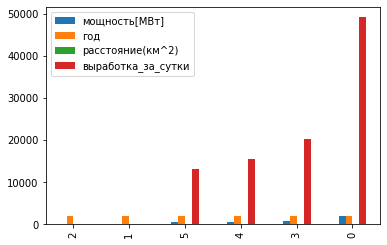

In [ ]:
# 11. Быстрая визуализация данных
# В предыдущей работе для визуализации данных применялись отдельные библиотеки.
# Но для быстрого получения графиков и гистограмм можно использовать очень простой код. 
df_exted.plot(kind = 'bar')
print()


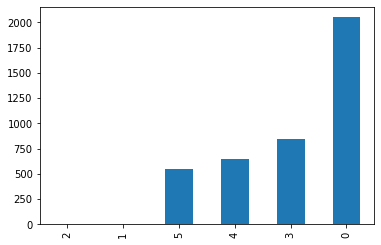

In [ ]:
# 12. Выбор столбцов для визуализации
df_exted['мощность[МВт]'].plot(kind = 'bar')
print()


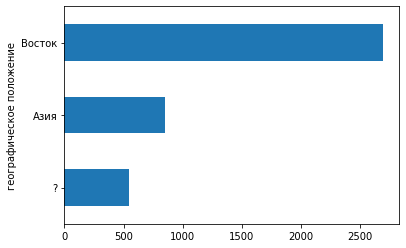

In [ ]:

# 13. Гистограмма после группировки
df_exted.groupby(['географическое положение'])['мощность[МВт]'].sum().plot(kind = 'barh')
print()


In [ ]:
# 14. Удаление строк по условию
df_del = df_exted.drop(df_exted[df_exted['мощность[МВт]'] < 400].index)
print(df_del)

                               имя  ... географическое положение
5            Топаз солнечная ферма  ...                        ?
4  Проект солнечной энергии Камути  ...                   Восток
3  Солнечный парк плотины Лунъянся  ...                     Азия
0          Павагада солнечный парк  ...                   Восток

[4 rows x 7 columns]


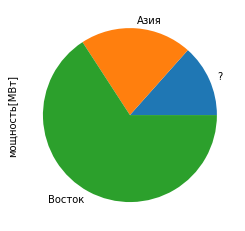

In [ ]:
# 15. Построение круговой диаграммы по данным.
df_exted.groupby(['географическое положение'])['мощность[МВт]'].sum().plot(kind = 'pie')
print()

In [ ]:
#16. Интерактивный график. 
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()
p = figure(plot_width = 800, plot_height = 400)

p.hbar(y = ['мощность[МВт]'], left=0, right=['географическое положение'] )

GlyphRenderer(id='1036', ...)